In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import zipfile

# Define paths
data_dir = '/content/drive/My Drive/Lab03 Dataset/CoLeaf DATASET'  # replace with your dataset path
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 809 images belonging to 10 classes.
Found 197 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_custom_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Model parameters
input_shape = (img_height, img_width, 3)
num_classes = len(train_generator.class_indices)

custom_cnn = create_custom_cnn(input_shape, num_classes)
custom_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
x = efficientnet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model_efficientnet = Model(inputs=efficientnet_base.input, outputs=predictions)
model_efficientnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# Training Custom CNN
history_custom_cnn = custom_cnn.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Training EfficientNet
history_efficientnet = model_efficientnet.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
26/26 [==============================] - 506s 19s/step - loss: 2.2133 - accuracy: 0.2732 - val_loss: 1.7976 - val_accuracy: 0.2995
Epoch 2/10
26/26 [==============================] - 104s 4s/step - loss: 1.7830 - accuracy: 0.3486 - val_loss: 1.7185 - val_accuracy: 0.3858
Epoch 3/10
26/26 [==============================] - 96s 4s/step - loss: 1.5813 - accuracy: 0.4227 - val_loss: 1.6707 - val_accuracy: 0.4315
Epoch 4/10
26/26 [==============================] - 105s 4s/step - loss: 1.5017 - accuracy: 0.4611 - val_loss: 1.6729 - val_accuracy: 0.4569
Epoch 5/10
26/26 [==============================] - 101s 4s/step - loss: 1.4430 - accuracy: 0.5006 - val_loss: 1.6593 - val_accuracy: 0.3249
Epoch 6/10
26/26 [==============================] - 100s 4s/step - loss: 1.3943 - accuracy: 0.5031 - val_loss: 1.6121 - val_accuracy: 0.3604
Epoch 7/10
26/26 [==============================] - 99s 4s/step - loss: 1.3504 - accuracy: 0.5352 - val_loss: 1.6643 - val_accuracy: 0.4721
Epoch 8/10
26/

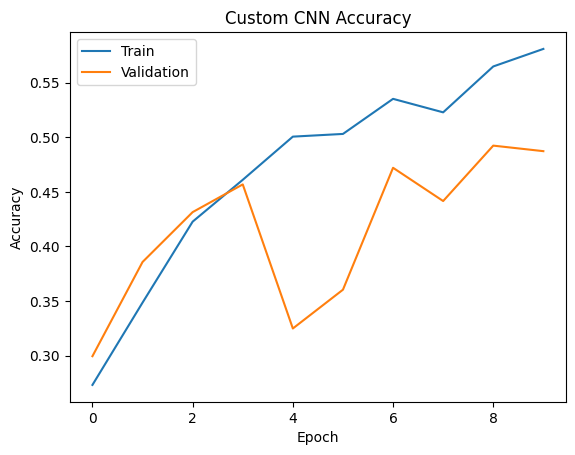

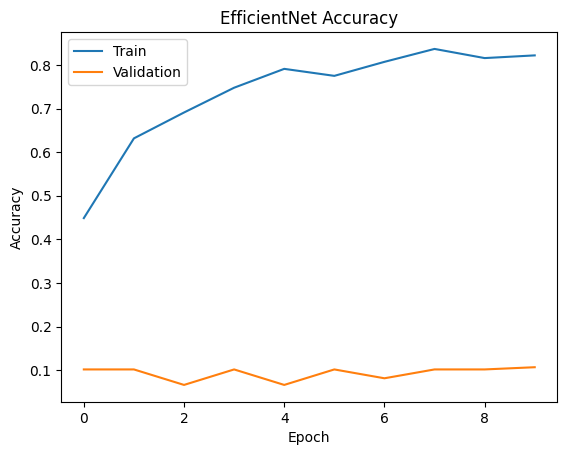

7/7 [==============================] - 19s 3s/step - loss: 4.5339 - accuracy: 0.1015
Custom CNN Accuracy: 45.18%
EfficientNet Accuracy: 10.15%


In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plotting the training history
plot_history(history_custom_cnn, 'Custom CNN Accuracy')
plot_history(history_efficientnet, 'EfficientNet Accuracy')

# Evaluate on validation data
custom_cnn_performance = custom_cnn.evaluate(validation_generator)
efficientnet_performance = model_efficientnet.evaluate(validation_generator)

print("Custom CNN Accuracy: {:.2f}%".format(custom_cnn_performance[1] * 100))
print("EfficientNet Accuracy: {:.2f}%".format(efficientnet_performance[1] * 100))


In [ ]:
print("Custom CNN Summary:")
custom_cnn.summary()

print("EfficientNet Summary:")
model_efficientnet.summary()


Custom CNN Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None